# Unemployment Claims in the United States

Review the unemployment claims in the United State in 2019 and 2020.

Original data from https://oui.doleta.gov/unemploy/claims.asp

## Import Dependencies

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import numpy as np
import warnings

## Grab Data

Read the csv file and store it. Display the first 5 rows as a preview.

In [7]:
unemployment_data = pd.read_csv(r'./data/State_by_Year.csv')

# Check the first few rows
unemployment_data.head()

,State,Year,Claims
0,Alabama,2019,130685
1,Alabama,2020,917838
2,Alaska,2019,48368
3,Alaska,2020,272157
4,Arizona,2019,203413


## Summarize the Numeric Columns

We can use `describe()` to summarize the numeric columns.

This will include the **Year** column, however, only the **Claims** column makes sense here.

In [8]:
# Summarize the numeric columns
print('Total Row Count =', len(unemployment_data))
unemployment_data.describe()

Total Row Count = 106


,Year,Claims
count,106.000000,1.060000e+02
mean,2019.500000,7.702800e+05
std,0.502375,1.432701e+06
min,2019.000000,1.532000e+03
25%,2019.000000,1.010010e+05
50%,2019.500000,2.830210e+05
75%,2020.000000,8.377425e+05
max,2020.000000,1.153777e+07


## Confirm Years in Data

Confirm that our data set only contains data for **2019** and **2020**.

In [4]:
# Confirm the number of years in the data.

data_years = unemployment_data['Year'].unique()
print('Years: ', data_years)

expected_number_of_years = 2
print('Number of years is 2? ',len(data_years) == 2)

Years:  [2019 2020]
Number of years is 2?  True


## Summarize Claims Column

In [5]:
# Define the column that we'll be plotting
desired_column = 'Claims'

# Summarize the Claims column
unemployment_data[desired_column].describe()

count    1.060000e+02
mean     7.702800e+05
std      1.432701e+06
min      1.532000e+03
25%      1.010010e+05
50%      2.830210e+05
75%      8.377425e+05
max      1.153777e+07
Name: Claims, dtype: float64

## Exclude Outliers

Looking at the Claims data, we can assume some outliers beyond the lower 25% and upper 75%.

* 25% --> 101,001
* 75% --> 837,742.5

Let's round to get some cutoffs:

* Minimum --> 100,000
* Maximum --> 900,000

We'll also create two new data sets.

* 2019 --> `unemployment_2019`
* 2020 --> `unemployment_2020`

In [10]:
# Exclude outliers
cutoff_min = 100000
cutoff_max = 900000
unemployment_data_limited = unemployment_data[unemployment_data[desired_column].between(cutoff_min, cutoff_max)]

# Create a box plot for each year
unemployment_2019 = unemployment_data_limited[unemployment_data['Year'] == 2019][desired_column]
unemployment_2020 = unemployment_data_limited[unemployment_data['Year'] == 2020][desired_column]

<ipython-input-10-5d5e3275272e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unemployment_2019 = unemployment_data_limited[unemployment_data['Year'] == 2019][desired_column]
<ipython-input-10-5d5e3275272e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unemployment_2020 = unemployment_data_limited[unemployment_data['Year'] == 2020][desired_column]


## Create Boxplots

Create a boxplot with our new datasets, `unemployment_2019` and `unemployment_2020`.

Text(0, 0.5, 'Claims')

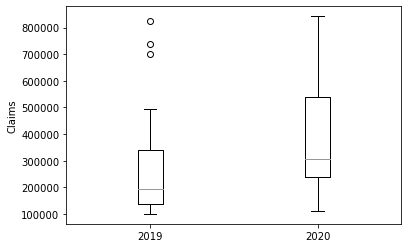

In [11]:
plt.boxplot([unemployment_2019, unemployment_2020], labels=['2019', '2020'])
plt.ylabel('Claims')

## Create Histogram for 2019

In [12]:
# bin_size = 5
# bins = math.ceil((max(unemployment_2019[desired_column]) - min(unemployment_2019[desired_column])) / bin_size)
# plt.hist(unemployment_2019[desired_column], bins=bins, edgecolor='black')
# plt.xlabel('Claims ($)')
# plt.ylabel('frequency')
# plt.title('Histogram of Unemployment Claims in all stats in 2019');

sns.histplot(unemployment_2019[desired_column], binwidth=5)
plt.xlabel('Unemployment Claims')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Claims in 2019');

KeyError: 'Claims'

## Create Histogram for 2020

In [13]:
# bin_size = 5
# bins = math.ceil((max(unemployment_2020[desired_column]) - min(unemployment_2020[desired_column])) / bin_size)
# plt.hist(unemployment_2020[desired_column], bins=bins, edgecolor='black')
# plt.xlabel('Claims ($)')
# plt.ylabel('frequency')
# plt.title('Histogram of Unemployment Claims in all stats in 2020');

sns.histplot(unemployment_2020[desired_column], binwidth=5)
plt.xlabel('Unemployment Claims')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Claims in 2020');

KeyError: 'Claims'